<a href="https://colab.research.google.com/github/hochschule-pforzheim/project-st23-team-y/blob/main/3_Sentimentanalyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">
    <font size="+7">Sentiment Analysis</font> <br>
</div>

#Vader Sentiment Analysis

Vader is a rule-based sentiment analysis that uses  a list of lexical features which are labeled as positive or negative according to their semantic orientation to calculate the text sentiment.

Vader is optimized for social media. The results might not be as good if applied to song lyrics. Also a known problem for VADER sentiment analysis is that it concentrates on individual words and thus the overall sentiment might be misleading.

In [1]:
import pandas as pd
import numpy as np
import string

#Imports relevant for Sentiment Analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import word_tokenize
import nltk.data
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
#display all columns, when analysing a dataframe in colab
pd.set_option('display.max_columns', None)

In [19]:
#Load the data
df_clean = pd.read_csv('/content/sample_data/df_final.csv')

In [20]:
df_clean.head()

,Unnamed: 0,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,lyrics,explicit_False,explicit_True,mode_0,mode_1,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,track_genre_acoustic,track_genre_afrobeat,track_genre_alt-rock,track_genre_alternative,track_genre_ambient,track_genre_anime,track_genre_black-metal,track_genre_bluegrass,track_genre_blues,track_genre_brazil,track_genre_breakbeat,track_genre_british,track_genre_cantopop,track_genre_chicago-house,track_genre_children,track_genre_chill,track_genre_classical,track_genre_club,track_genre_comedy,track_genre_country,track_genre_dance,track_genre_dancehall,track_genre_death-metal,track_genre_deep-house,track_genre_detroit-techno,track_genre_disco,track_genre_disney,track_genre_drum-and-bass,track_genre_dub,track_genre_dubstep,track_genre_edm,track_genre_electro,track_genre_electronic,track_genre_emo,track_genre_folk,track_genre_forro,track_genre_french,track_genre_funk,track_genre_garage,track_genre_german,track_genre_gospel,track_genre_goth,track_genre_grindcore,track_genre_groove,track_genre_grunge,track_genre_guitar,track_genre_happy,track_genre_hard-rock,track_genre_hardcore,track_genre_hardstyle,track_genre_heavy-metal,track_genre_hip-hop,track_genre_honky-tonk,track_genre_house,track_genre_idm,track_genre_indian,track_genre_indie,track_genre_indie-pop,track_genre_industrial,track_genre_iranian,track_genre_j-dance,track_genre_j-idol,track_genre_j-pop,track_genre_j-rock,track_genre_jazz,track_genre_k-pop,track_genre_kids,track_genre_latin,track_genre_latino,track_genre_malay,track_genre_mandopop,track_genre_metal,track_genre_metalcore,track_genre_minimal-techno,track_genre_mpb,track_genre_new-age,track_genre_opera,track_genre_pagode,track_genre_party,track_genre_piano,track_genre_pop,track_genre_pop-film,track_genre_power-pop,track_genre_progressive-house,track_genre_psych-rock,track_genre_punk,track_genre_punk-rock,track_genre_r-n-b,track_genre_reggae,track_genre_reggaeton,track_genre_rock,track_genre_rock-n-roll,track_genre_rockabilly,track_genre_romance,track_genre_sad,track_genre_salsa,track_genre_samba,track_genre_sertanejo,track_genre_show-tunes,track_genre_singer-songwriter,track_genre_ska,track_genre_sleep,track_genre_songwriter,track_genre_soul,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,2,36,295909,0.437,0.607,-5.704,0.0428,0.332000,0.000,0.1420,0.275,176.025,what if i if i were to confess you're the gre...,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,11,49,149973,0.578,0.295,-10.379,0.0294,0.792000,0.000,0.1090,0.603,101.171,wo oh yay yay love you more than i can say i'l...,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,12,66,310346,0.423,0.954,-3.157,0.0470,0.002100,0.000,0.1770,0.500,144.553,and i feel that time's a wasted go so where...,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,20,57,238373,0.480,0.970,-5.006,0.0595,0.000037,0.309,0.2900,0.346,136.123,i'm running out of time i'm running out i'm ...,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [21]:
#drop index column from csv file
df_clean = df_clean.drop('Unnamed: 0', axis = 1)

In [22]:
#Find out what the index of the lyrics columns is to insert in the loop below
print(df_clean.columns.get_loc('lyrics'))

11


In [23]:
#Check lyrics columns
df_clean.iloc[:,11].head()

0     what if i if i were to confess you're the gre...
1    wo oh yay yay love you more than i can say i'l...
2       and i feel that time's a wasted go so where...
3     i'm running out of time i'm running out  i'm ...
4    if i had a kingdom i would give up my throne i...
Name: lyrics, dtype: object

We conduct a sentiment analysis, that appends the result columns to the dataframe.

**negative/neutral/positive:** proportion of text that assigned to the respective category

**compound:** metric, that ranges between -1 (maximum amount of negativity) and 1 (maximum amount of positivity)

In [24]:
#Sentiment Analysis unsing NLTK (Natural Language Tool Kid) Sentiment Analysis (VADER)
#Create lists to store the different scores for each word
negative_vader = []
neutral_vader = []
positive_vader = []
compound_vader = []
#Initialize the model
sid = SentimentIntensityAnalyzer()
#Iterate for each row of lyrics and append the scores
for i in df_clean.index:
    scores = sid.polarity_scores(str(df_clean.iloc[i, 11]))
    negative_vader.append(scores['neg'])
    neutral_vader.append(scores['neu'])
    positive_vader.append(scores['pos'])
    compound_vader.append(scores['compound'])
#Create 4 columns to the main data frame  for each score
df_clean['negative_vader'] = negative_vader
df_clean['neutral_vader'] = neutral_vader
df_clean['positive_vader'] = positive_vader
df_clean['compound_vader'] = compound_vader
df_clean.head()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,lyrics,explicit_False,explicit_True,mode_0,mode_1,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,track_genre_acoustic,track_genre_afrobeat,track_genre_alt-rock,track_genre_alternative,track_genre_ambient,track_genre_anime,track_genre_black-metal,track_genre_bluegrass,track_genre_blues,track_genre_brazil,track_genre_breakbeat,track_genre_british,track_genre_cantopop,track_genre_chicago-house,track_genre_children,track_genre_chill,track_genre_classical,track_genre_club,track_genre_comedy,track_genre_country,track_genre_dance,track_genre_dancehall,track_genre_death-metal,track_genre_deep-house,track_genre_detroit-techno,track_genre_disco,track_genre_disney,track_genre_drum-and-bass,track_genre_dub,track_genre_dubstep,track_genre_edm,track_genre_electro,track_genre_electronic,track_genre_emo,track_genre_folk,track_genre_forro,track_genre_french,track_genre_funk,track_genre_garage,track_genre_german,track_genre_gospel,track_genre_goth,track_genre_grindcore,track_genre_groove,track_genre_grunge,track_genre_guitar,track_genre_happy,track_genre_hard-rock,track_genre_hardcore,track_genre_hardstyle,track_genre_heavy-metal,track_genre_hip-hop,track_genre_honky-tonk,track_genre_house,track_genre_idm,track_genre_indian,track_genre_indie,track_genre_indie-pop,track_genre_industrial,track_genre_iranian,track_genre_j-dance,track_genre_j-idol,track_genre_j-pop,track_genre_j-rock,track_genre_jazz,track_genre_k-pop,track_genre_kids,track_genre_latin,track_genre_latino,track_genre_malay,track_genre_mandopop,track_genre_metal,track_genre_metalcore,track_genre_minimal-techno,track_genre_mpb,track_genre_new-age,track_genre_opera,track_genre_pagode,track_genre_party,track_genre_piano,track_genre_pop,track_genre_pop-film,track_genre_power-pop,track_genre_progressive-house,track_genre_psych-rock,track_genre_punk,track_genre_punk-rock,track_genre_r-n-b,track_genre_reggae,track_genre_reggaeton,track_genre_rock,track_genre_rock-n-roll,track_genre_rockabilly,track_genre_romance,track_genre_sad,track_genre_salsa,track_genre_samba,track_genre_sertanejo,track_genre_show-tunes,track_genre_singer-songwriter,track_genre_ska,track_genre_sleep,track_genre_songwriter,track_genre_soul,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5,negative_vader,neutral_vader,positive_vader,compound_vader
0,36,295909,0.437,0.607,-5.704,0.0428,0.332000,0.000,0.1420,0.275,176.025,what if i if i were to confess you're the gre...,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.081,0.722,0.197,0.9778
1,49,149973,0.578,0.295,-10.379,0.0294,0.792000,0.000,0.1090,0.603,101.171,wo oh yay yay love you more than i can say i'l...,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.053,0.581,0.366,0.9968
2,66,310346,0.423,0.954,-3.157,0.0470,0.002100,0.000,0.1770,0.500,144.553,and i feel that time's a wasted go so where...,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.046,0.920,0.034,-0.2732
3,57,238373,0.480,0.970,-5.006,0.0595,0.000037,0.309,0.2900,0.346,136.1

In [25]:
df_clean.describe()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,explicit_False,explicit_True,mode_0,mode_1,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,track_genre_acoustic,track_genre_afrobeat,track_genre_alt-rock,track_genre_alternative,track_genre_ambient,track_genre_anime,track_genre_black-metal,track_genre_bluegrass,track_genre_blues,track_genre_brazil,track_genre_breakbeat,track_genre_british,track_genre_cantopop,track_genre_chicago-house,track_genre_children,track_genre_chill,track_genre_classical,track_genre_club,track_genre_comedy,track_genre_country,track_genre_dance,track_genre_dancehall,track_genre_death-metal,track_genre_deep-house,track_genre_detroit-techno,track_genre_disco,track_genre_disney,track_genre_drum-and-bass,track_genre_dub,track_genre_dubstep,track_genre_edm,track_genre_electro,track_genre_electronic,track_genre_emo,track_genre_folk,track_genre_forro,track_genre_french,track_genre_funk,track_genre_garage,track_genre_german,track_genre_gospel,track_genre_goth,track_genre_grindcore,track_genre_groove,track_genre_grunge,track_genre_guitar,track_genre_happy,track_genre_hard-rock,track_genre_hardcore,track_genre_hardstyle,track_genre_heavy-metal,track_genre_hip-hop,track_genre_honky-tonk,track_genre_house,track_genre_idm,track_genre_indian,track_genre_indie,track_genre_indie-pop,track_genre_industrial,track_genre_iranian,track_genre_j-dance,track_genre_j-idol,track_genre_j-pop,track_genre_j-rock,track_genre_jazz,track_genre_k-pop,track_genre_kids,track_genre_latin,track_genre_latino,track_genre_malay,track_genre_mandopop,track_genre_metal,track_genre_metalcore,track_genre_minimal-techno,track_genre_mpb,track_genre_new-age,track_genre_opera,track_genre_pagode,track_genre_party,track_genre_piano,track_genre_pop,track_genre_pop-film,track_genre_power-pop,track_genre_progressive-house,track_genre_psych-rock,track_genre_punk,track_genre_punk-rock,track_genre_r-n-b,track_genre_reggae,track_genre_reggaeton,track_genre_rock,track_genre_rock-n-roll,track_genre_rockabilly,track_genre_romance,track_genre_sad,track_genre_salsa,track_genre_samba,track_genre_sertanejo,track_genre_show-tunes,track_genre_singer-songwriter,track_genre_ska,track_genre_sleep,track_genre_songwriter,track_genre_soul,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5,negative_vader,neutral_vader,positive_vader,compound_vader
count,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.0,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.0,2489.000000,2489.000000,2489.0,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.0,2489.000000,2489.000000,2489.0,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000

We can see that the average value of the neutralness of the lyrics is significantly higher than that of the respective positiveness or negativeness. Thus we would like to check the distribution of the values in the "neutral" column.

Text(0, 0.5, 'frequency')

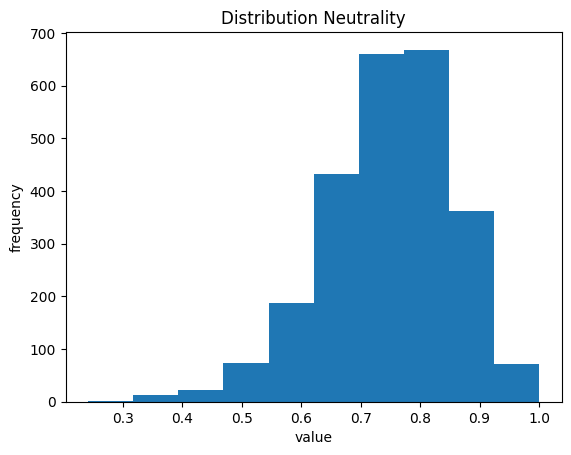

In [26]:
import matplotlib.pyplot as plt

plt.hist(df_clean.neutral_vader)
plt.title("Distribution Neutrality")
plt.xlabel("value")
plt.ylabel("frequency")


We now want to check which words are mostly used in the songs and visualise them in a word cloud. To do this we need to create a list with all the words used in the song. The words should be included in the list only once.

In [27]:
#define a function, that returns a list with all the words in the lyrics column. Every word is included only once.
def get_unique_word_list(lyrics):
    word_list = lyrics.split()
    unique_word_list = list(set(word_list)) #when converting the list to a set, the duplicate words are removed
    return unique_word_list

In [28]:
#Append a new column "WordList" which contains a list with all the used columns
df_clean['WordList'] = df_clean['lyrics'].apply(get_unique_word_list)

In [29]:
df_clean.head()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,lyrics,explicit_False,explicit_True,mode_0,mode_1,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,track_genre_acoustic,track_genre_afrobeat,track_genre_alt-rock,track_genre_alternative,track_genre_ambient,track_genre_anime,track_genre_black-metal,track_genre_bluegrass,track_genre_blues,track_genre_brazil,track_genre_breakbeat,track_genre_british,track_genre_cantopop,track_genre_chicago-house,track_genre_children,track_genre_chill,track_genre_classical,track_genre_club,track_genre_comedy,track_genre_country,track_genre_dance,track_genre_dancehall,track_genre_death-metal,track_genre_deep-house,track_genre_detroit-techno,track_genre_disco,track_genre_disney,track_genre_drum-and-bass,track_genre_dub,track_genre_dubstep,track_genre_edm,track_genre_electro,track_genre_electronic,track_genre_emo,track_genre_folk,track_genre_forro,track_genre_french,track_genre_funk,track_genre_garage,track_genre_german,track_genre_gospel,track_genre_goth,track_genre_grindcore,track_genre_groove,track_genre_grunge,track_genre_guitar,track_genre_happy,track_genre_hard-rock,track_genre_hardcore,track_genre_hardstyle,track_genre_heavy-metal,track_genre_hip-hop,track_genre_honky-tonk,track_genre_house,track_genre_idm,track_genre_indian,track_genre_indie,track_genre_indie-pop,track_genre_industrial,track_genre_iranian,track_genre_j-dance,track_genre_j-idol,track_genre_j-pop,track_genre_j-rock,track_genre_jazz,track_genre_k-pop,track_genre_kids,track_genre_latin,track_genre_latino,track_genre_malay,track_genre_mandopop,track_genre_metal,track_genre_metalcore,track_genre_minimal-techno,track_genre_mpb,track_genre_new-age,track_genre_opera,track_genre_pagode,track_genre_party,track_genre_piano,track_genre_pop,track_genre_pop-film,track_genre_power-pop,track_genre_progressive-house,track_genre_psych-rock,track_genre_punk,track_genre_punk-rock,track_genre_r-n-b,track_genre_reggae,track_genre_reggaeton,track_genre_rock,track_genre_rock-n-roll,track_genre_rockabilly,track_genre_romance,track_genre_sad,track_genre_salsa,track_genre_samba,track_genre_sertanejo,track_genre_show-tunes,track_genre_singer-songwriter,track_genre_ska,track_genre_sleep,track_genre_songwriter,track_genre_soul,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5,negative_vader,neutral_vader,positive_vader,compound_vader,WordList
0,36,295909,0.437,0.607,-5.704,0.0428,0.332000,0.000,0.1420,0.275,176.025,what if i if i were to confess you're the gre...,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.081,0.722,0.197,0.9778,"[keep, happens, in, chance, all, broken, frien..."
1,49,149973,0.578,0.295,-10.379,0.0294,0.792000,0.000,0.1090,0.603,101.171,wo oh yay yay love you more than i can say i'l...,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.053,0.581,0.366,0.9968,"[mean, twice, sayyou, to, just, oh, filled, al..."
2,66,310346,0.423,0.954,-3.157,0.0470,0.002100,0.000,0.1770,0.500,144.553,and i feel that time's a wasted go so where...,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

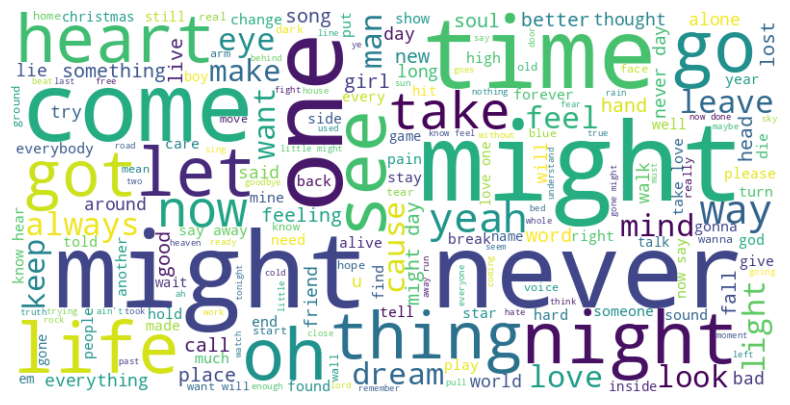

In [ ]:
#Now that we have a list with all the words used for every song we would like to visualise that in order to see what kind of words are mostly used.

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# We need to generate one list with all the words used in order to be able to visualise them in one wordcloud
all_words = []
for word_list in df_clean['WordList']:
    all_words.extend(word_list)

# Generate the word cloud based on the words used most frequently
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# now that we have seen the word cloud we would also like to have some numerical measures. We now count how often each word is used
word_count = {}
for word in set(all_words):
    count = all_words.count(word)
    word_count[word] = count

#print the frequency of the words
for word, count in word_count.items():
    print(f'{word}: {count}')

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
kom: 1
concept: 3
earth's: 1
dissin': 5
earthly: 2
iced: 3
volar: 1
reunion: 3
eft: 1
underrated: 1
tyler: 4
landslideyou: 1
paisley: 1
galloped: 1
janie: 1
satan's: 3
ty: 2
charm: 6
jailhouse: 2
todrick: 2
torment: 3
blitzen: 3
uw: 1
cheesy: 2
does: 79
gunna: 3
02: 1
belting: 1
gown: 1
salvation: 12
fko: 1
thinkers: 1
unload: 1
dirtaaaay: 1
enterprise: 1
shy: 16
tapes: 1
ana: 1
cyaa: 3
vs: 1
nintendo: 1
firebrands: 2
yawnin: 1
running: 139
likewhile: 1
kubricks: 1
liketurn: 2
buried: 17
converge: 1
prime: 4
napkins: 1
includin: 1
comprende: 1
tampje: 1
comparison: 1
disqualified: 2
bkgw: 1
sadness: 16
itzyfeb: 1
boothe: 1
area: 7
'tll: 1
lanthanum: 1
struggle: 17
5'9: 2
incomprehension: 1
itching: 3
undone: 16
scratch: 3
liners: 1
tahjere: 5
likela: 1
blok: 1
clawfoot: 1
redeeming: 2
zeroes: 1
unconstrained: 1
named: 10
glue: 3
congratulations: 2
354: 5
corresponds: 1
blades: 4
batphone: 1
everybody: 136
physique: 1
pr

In [ ]:
#we now want to sort the dictionary in order for the words used most frequently to appear in the first places
dict(sorted(word_count.items(), key=lambda item: item[1], reverse = True))

{'also': 2467,
 'might': 2467,
 'you': 2382,
 'the': 2337,
 'like': 2192,
 'and': 2177,
 'to': 2155,
 'i': 2050,
 'a': 1952,
 'in': 1882,
 'me': 1747,
 'of': 1690,
 'it': 1627,
 'my': 1617,
 'that': 1503,
 'all': 1502,
 'on': 1442,
 'your': 1439,
 'is': 1375,
 'for': 1350,
 'be': 1296,
 "i'm": 1252,
 'but': 1252,
 'with': 1206,
 'so': 1200,
 'just': 1114,
 "don't": 1070,
 'when': 1069,
 'know': 1055,
 'we': 1041,
 "it's": 1040,
 'this': 1039,
 'no': 1024,
 'now': 965,
 'what': 960,
 'up': 952,
 'can': 923,
 'out': 909,
 'see': 888,
 'love': 874,
 'time': 856,
 'if': 855,
 'down': 843,
 'go': 831,
 'one': 828,
 'oh': 800,
 'never': 775,
 'are': 770,
 'do': 755,
 'have': 753,
 "you're": 734,
 'get': 729,
 'from': 721,
 'got': 710,
 'will': 706,
 'not': 686,
 "can't": 676,
 'at': 675,
 'way': 654,
 'say': 641,
 'was': 638,
 'take': 621,
 'they': 616,
 'yeah': 611,
 'feel': 610,
 'come': 608,
 'make': 606,
 'back': 602,
 'how': 602,
 'here': 589,
 "i'll": 586,
 'as': 571,
 'let': 562,
 'be

We now see that the words used the most are neutral words, that dont have a certain sentiment e.g. "also", "might" etc.. We thus concluded that this is the reason for the high average value of the neutralness score.

# Textblob

As there are multiple varieties of sentiment analyses that are also based on different models or algorithms, we also wanted to do more than one.

So as the next one, we chose the TextBlob sentiment analysis.

Textblob is a Python library for processing textual data, based on the Natural Language Toolkit (NTLK). It's possible to perform Natural Language Processing, thus also a sentiment analysis. Within this sentiment analysis, the values "polarity" and "subjectivity" are calculated.

The polarity score is a float within the range [-1.0, 1.0].
- -1 = negative sentiment
- 1 = positive sentiment

The subjectivity score is a float within the range [0.0, 1.0].

Here, we focus on the **polarity** score as it more closely resembles the sentiment of the song.

In [9]:
# install & download the necessary ressurces for the TextBlob library
!pip install textblob
!python textblob.download_corpora

python3: can't open file '/content/textblob.download_corpora': [Errno 2] No such file or directory


In [10]:
# download all relevant nltk packages, in order to be able to use textblob
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [11]:
from textblob import TextBlob
import pandas as pd

In [30]:
# look at the prepared dataset that contains the relevant variables (lyrics)
df_clean

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,lyrics,explicit_False,explicit_True,mode_0,mode_1,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,track_genre_acoustic,track_genre_afrobeat,track_genre_alt-rock,track_genre_alternative,track_genre_ambient,track_genre_anime,track_genre_black-metal,track_genre_bluegrass,track_genre_blues,track_genre_brazil,track_genre_breakbeat,track_genre_british,track_genre_cantopop,track_genre_chicago-house,track_genre_children,track_genre_chill,track_genre_classical,track_genre_club,track_genre_comedy,track_genre_country,track_genre_dance,track_genre_dancehall,track_genre_death-metal,track_genre_deep-house,track_genre_detroit-techno,track_genre_disco,track_genre_disney,track_genre_drum-and-bass,track_genre_dub,track_genre_dubstep,track_genre_edm,track_genre_electro,track_genre_electronic,track_genre_emo,track_genre_folk,track_genre_forro,track_genre_french,track_genre_funk,track_genre_garage,track_genre_german,track_genre_gospel,track_genre_goth,track_genre_grindcore,track_genre_groove,track_genre_grunge,track_genre_guitar,track_genre_happy,track_genre_hard-rock,track_genre_hardcore,track_genre_hardstyle,track_genre_heavy-metal,track_genre_hip-hop,track_genre_honky-tonk,track_genre_house,track_genre_idm,track_genre_indian,track_genre_indie,track_genre_indie-pop,track_genre_industrial,track_genre_iranian,track_genre_j-dance,track_genre_j-idol,track_genre_j-pop,track_genre_j-rock,track_genre_jazz,track_genre_k-pop,track_genre_kids,track_genre_latin,track_genre_latino,track_genre_malay,track_genre_mandopop,track_genre_metal,track_genre_metalcore,track_genre_minimal-techno,track_genre_mpb,track_genre_new-age,track_genre_opera,track_genre_pagode,track_genre_party,track_genre_piano,track_genre_pop,track_genre_pop-film,track_genre_power-pop,track_genre_progressive-house,track_genre_psych-rock,track_genre_punk,track_genre_punk-rock,track_genre_r-n-b,track_genre_reggae,track_genre_reggaeton,track_genre_rock,track_genre_rock-n-roll,track_genre_rockabilly,track_genre_romance,track_genre_sad,track_genre_salsa,track_genre_samba,track_genre_sertanejo,track_genre_show-tunes,track_genre_singer-songwriter,track_genre_ska,track_genre_sleep,track_genre_songwriter,track_genre_soul,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5,negative_vader,neutral_vader,positive_vader,compound_vader,WordList
0,36,295909,0.437,0.607,-5.704,0.0428,0.332000,0.000000,0.1420,0.275,176.025,what if i if i were to confess you're the gre...,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.081,0.722,0.197,0.9778,"[keep, happens, in, chance, all, broken, frien..."
1,49,149973,0.578,0.295,-10.379,0.0294,0.792000,0.000000,0.1090,0.603,101.171,wo oh yay yay love you more than i can say i'l...,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.053,0.581,0.366,0.9968,"[mean, twice, sayyou, to, just, oh, filled, al..."
2,66,310346,0.423,0.954,-3.157,0.0470,0.002100,0.000000,0.1770,0.500,144.553,and i feel that time's a wasted go so where...,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [31]:
# get the index number of the lyrics column
df_clean.columns.get_loc('lyrics')

11

In [32]:
# to test the desired approach, we first get the lyrics for one specific row to see what they look like
df_clean.iloc[1, 11]

"wo oh yay yay love you more than i can say i'll love you twice as much tomorrow wo oh  love you more than i can say  wo oh yay yay i miss you every single day why must my life be filled with sorrow wo oh  love you more than i can say  don't you know i need you so tell me please  i gotta know do you mean to make me cry am i just another guy  wo oh yay yay love you more than i can say i'll love you twice as much tomorrow wo oh  love you more than i can say  don't you know i need you so tell me please  i gotta know do you mean to make me cry am i just another guy  wo oh yay yay i love you more than i can say i'll love you twice as much tomorrow wo oh  love you more than i can sayyou might also like"

In [33]:
# try the textblob for one lyrics entry in df_clean
lyrics = df_clean.iloc[1, 11]

# calculate the polarity value for the chosen lyrics
blob = TextBlob(lyrics)
blob.tags
blob.noun_phrases
for sentence in blob.sentences:
    print(sentence.sentiment.polarity)

0.3668154761904762


The output 0.3668154761904762 is the polarity score. In this case it suggests a moderately posivite sentiment.

As the code did indeed work & delivered the desired result, namely a polarity score between -1 & 1, we now want to calculate a score for every row in the dataset.

In [34]:
# define a function that calculates the polarity for every lyrics entry in the dataframe & append the polarity as a new column
def calculate_polarity(lyrics):
    blob = TextBlob(lyrics)
    polarity = blob.sentiment.polarity
    return polarity

# Apply the calculate_polarity function to each value in the 'lyrics' column
df_clean['polarity_textblob'] = df_clean['lyrics'].apply(calculate_polarity)

# Print the updated dataframe
df_clean

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,lyrics,explicit_False,explicit_True,mode_0,mode_1,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,track_genre_acoustic,track_genre_afrobeat,track_genre_alt-rock,track_genre_alternative,track_genre_ambient,track_genre_anime,track_genre_black-metal,track_genre_bluegrass,track_genre_blues,track_genre_brazil,track_genre_breakbeat,track_genre_british,track_genre_cantopop,track_genre_chicago-house,track_genre_children,track_genre_chill,track_genre_classical,track_genre_club,track_genre_comedy,track_genre_country,track_genre_dance,track_genre_dancehall,track_genre_death-metal,track_genre_deep-house,track_genre_detroit-techno,track_genre_disco,track_genre_disney,track_genre_drum-and-bass,track_genre_dub,track_genre_dubstep,track_genre_edm,track_genre_electro,track_genre_electronic,track_genre_emo,track_genre_folk,track_genre_forro,track_genre_french,track_genre_funk,track_genre_garage,track_genre_german,track_genre_gospel,track_genre_goth,track_genre_grindcore,track_genre_groove,track_genre_grunge,track_genre_guitar,track_genre_happy,track_genre_hard-rock,track_genre_hardcore,track_genre_hardstyle,track_genre_heavy-metal,track_genre_hip-hop,track_genre_honky-tonk,track_genre_house,track_genre_idm,track_genre_indian,track_genre_indie,track_genre_indie-pop,track_genre_industrial,track_genre_iranian,track_genre_j-dance,track_genre_j-idol,track_genre_j-pop,track_genre_j-rock,track_genre_jazz,track_genre_k-pop,track_genre_kids,track_genre_latin,track_genre_latino,track_genre_malay,track_genre_mandopop,track_genre_metal,track_genre_metalcore,track_genre_minimal-techno,track_genre_mpb,track_genre_new-age,track_genre_opera,track_genre_pagode,track_genre_party,track_genre_piano,track_genre_pop,track_genre_pop-film,track_genre_power-pop,track_genre_progressive-house,track_genre_psych-rock,track_genre_punk,track_genre_punk-rock,track_genre_r-n-b,track_genre_reggae,track_genre_reggaeton,track_genre_rock,track_genre_rock-n-roll,track_genre_rockabilly,track_genre_romance,track_genre_sad,track_genre_salsa,track_genre_samba,track_genre_sertanejo,track_genre_show-tunes,track_genre_singer-songwriter,track_genre_ska,track_genre_sleep,track_genre_songwriter,track_genre_soul,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5,negative_vader,neutral_vader,positive_vader,compound_vader,WordList,polarity_textblob
0,36,295909,0.437,0.607,-5.704,0.0428,0.332000,0.000000,0.1420,0.275,176.025,what if i if i were to confess you're the gre...,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.081,0.722,0.197,0.9778,"[keep, happens, in, chance, all, broken, frien...",0.090476
1,49,149973,0.578,0.295,-10.379,0.0294,0.792000,0.000000,0.1090,0.603,101.171,wo oh yay yay love you more than i can say i'l...,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.053,0.581,0.366,0.9968,"[mean, twice, sayyou, to, just, oh, filled, al...",0.366815
2,66,310346,0.423,0.954,-3.157,0.0470,0.002100,0.000000,0.1770,0.500,144.553,and i feel that time's a wasted go so where...,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [35]:
# now let's look at the statistics
df_clean.describe()

# min value of polarity: -1
# max value of polarity: 0.8

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,explicit_False,explicit_True,mode_0,mode_1,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,track_genre_acoustic,track_genre_afrobeat,track_genre_alt-rock,track_genre_alternative,track_genre_ambient,track_genre_anime,track_genre_black-metal,track_genre_bluegrass,track_genre_blues,track_genre_brazil,track_genre_breakbeat,track_genre_british,track_genre_cantopop,track_genre_chicago-house,track_genre_children,track_genre_chill,track_genre_classical,track_genre_club,track_genre_comedy,track_genre_country,track_genre_dance,track_genre_dancehall,track_genre_death-metal,track_genre_deep-house,track_genre_detroit-techno,track_genre_disco,track_genre_disney,track_genre_drum-and-bass,track_genre_dub,track_genre_dubstep,track_genre_edm,track_genre_electro,track_genre_electronic,track_genre_emo,track_genre_folk,track_genre_forro,track_genre_french,track_genre_funk,track_genre_garage,track_genre_german,track_genre_gospel,track_genre_goth,track_genre_grindcore,track_genre_groove,track_genre_grunge,track_genre_guitar,track_genre_happy,track_genre_hard-rock,track_genre_hardcore,track_genre_hardstyle,track_genre_heavy-metal,track_genre_hip-hop,track_genre_honky-tonk,track_genre_house,track_genre_idm,track_genre_indian,track_genre_indie,track_genre_indie-pop,track_genre_industrial,track_genre_iranian,track_genre_j-dance,track_genre_j-idol,track_genre_j-pop,track_genre_j-rock,track_genre_jazz,track_genre_k-pop,track_genre_kids,track_genre_latin,track_genre_latino,track_genre_malay,track_genre_mandopop,track_genre_metal,track_genre_metalcore,track_genre_minimal-techno,track_genre_mpb,track_genre_new-age,track_genre_opera,track_genre_pagode,track_genre_party,track_genre_piano,track_genre_pop,track_genre_pop-film,track_genre_power-pop,track_genre_progressive-house,track_genre_psych-rock,track_genre_punk,track_genre_punk-rock,track_genre_r-n-b,track_genre_reggae,track_genre_reggaeton,track_genre_rock,track_genre_rock-n-roll,track_genre_rockabilly,track_genre_romance,track_genre_sad,track_genre_salsa,track_genre_samba,track_genre_sertanejo,track_genre_show-tunes,track_genre_singer-songwriter,track_genre_ska,track_genre_sleep,track_genre_songwriter,track_genre_soul,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5,negative_vader,neutral_vader,positive_vader,compound_vader,polarity_textblob
count,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.0,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.0,2489.000000,2489.000000,2489.0,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.0,2489.000000,2489.000000,2489.0,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,24

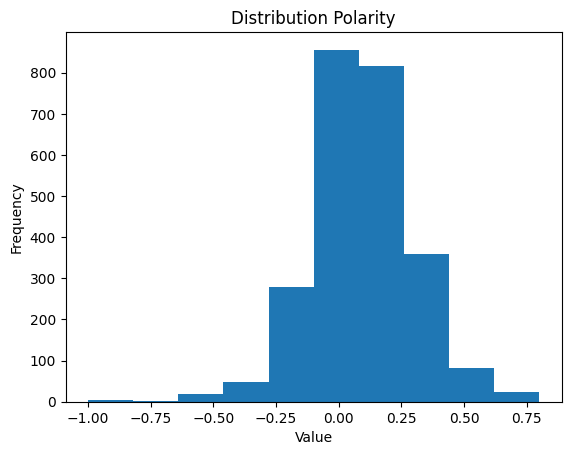

In [36]:
# look at the distribution of the calculated polarity
import matplotlib.pyplot as plt
import numpy as np

plt.hist(df_clean.polarity_textblob)
plt.title("Distribution Polarity")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

We can see that the polarity of the TextBlob sentiment analysis is normally distributed, with an accumulation of observations around -0.1 to 0.25, which makes sense, as most songs don't really have a strong polarity in either direction.